<a href="https://colab.research.google.com/github/Felipeosouz/Formacao-Cientista-de-Dados/blob/main/Machine%20Learning/Soybean_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

base = pd.read_csv("soybean.csv")
base.shape

(683, 36)

In [ ]:
base.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [ ]:
X = base.iloc[:, 0:35].values
y = base.iloc[:, 35].values

labelencoder = LabelEncoder()

for x in range(35):
  X[:, x] = labelencoder.fit_transform(X[:, x])
X

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size = 0.3, random_state = 0)

modelo = GaussianNB()
modelo.fit(X_treino, y_treino)

GaussianNB()

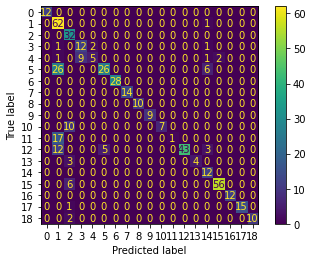

In [ ]:
previsoes = modelo.predict(X_teste)

confusao = confusion_matrix(y_teste, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix = confusao)
disp.plot()

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7724425887265136